# 2018-04-16 Loading data

All Samples are here:
all_matched_samples.gct

In [1]:
samples_file = "all_matched_samples.gct"

In [2]:
import pandas as pd
import numpy as np
import cuzcatlan as cusca
df = pd.read_table(samples_file, skiprows=2, index_col=0)
Description = df['Description']
df.drop('Description', axis=1, inplace=True)
df.shape

(55490, 224)

# 2018-04-16 Filtering data

<div class="well well-sm">
Applying a varaiance filter. Filtering out genes with lower standar deviation than 100. Mean std is about 874 for this dataset.
</div>

In [3]:
std = df.std(axis=1)
min_std = 100
# mean = df.mean(axis=1)
new_std = std[std > min_std]
print("{} genes were filtered out -- they had a Standard Deviation lower than {} (mean std was ~{})".format(std.count() - new_std.count(), min_std, int(std.mean()) ))
print("New gene lengths is {}".format(new_std.count()))
filtered_df = df.ix[new_std.index]
filtered_df.insert(loc=0,column='Description', value = Description.ix[new_std.index])
filtered_df

39151 genes were filtered out -- they had a Standard Deviation lower than 100 (mean std was ~874)
New gene lengths is 16339


/Users/edjuaro/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/Users/edjuaro/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Description,TCGA-A7-A0CE-01,TCGA-A7-A0CE-11,TCGA-A7-A0CH-01,TCGA-A7-A0CH-11,TCGA-A7-A0D9-01,TCGA-A7-A0D9-11,TCGA-A7-A0DB-01,TCGA-A7-A0DB-11,TCGA-A7-A0DC-01,...,TCGA-E9-A1RF-01,TCGA-E9-A1RF-11,TCGA-E9-A1RH-01,TCGA-E9-A1RH-11,TCGA-E9-A1RI-01,TCGA-E9-A1RI-11,TCGA-GI-A2C8-01,TCGA-GI-A2C8-11,TCGA-GI-A2C9-01,TCGA-GI-A2C9-11
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,tetraspanin 6,8462.0,5404.0,3036.0,5030.0,2679.0,3616.0,2203.0,2425.0,4094.0,...,676.0,4544.0,327.0,3581.0,1980.0,7639.0,8586.0,422.0,3944.0,4849.0
TNMD,tenomodulin,54.0,320.0,0.0,2116.0,73.0,3616.0,47.0,304.0,14.0,...,41.0,1881.0,0.0,770.0,5.0,3541.0,5.0,16.0,2.0,310.0
DPM1,dolichyl-phosphate mannosyltransferase subunit...,2408.0,2472.0,1497.0,1611.0,4135.0,1254.0,1131.0,1137.0,3050.0,...,3732.0,1565.0,6267.0,1615.0,2885.0,1999.0,2687.0,1675.0,2708.0,2290.0
SCYL3,SCY1 like pseudokinase 3,1518.0,1483.0,3030.0,1154.0,1852.0,820.0,1919.0,687.0,1906.0,...,3155.0,1356.0,775.0,1216.0,2538.0,1287.0,3240.0,751.0,1524.0,1265.0
C1orf112,chromosome 1 open reading frame 112,2056.0,312.0,730.0,252.0,366.0,225.0,725.0,241.0,846.0,...,1010.0,294.0,770.0,236.0,741.0,290.0,617.0,88.0,657.0,343.0
FGR,"FGR proto-oncogene, Src family tyrosine kinase",287.0,869.0,173.0,1536.0,201.0,969.0,846.0,1517.0,102.0,...,910.0,1006.0,338.0,578.0,399.0,377.0,475.0,129.0,422.0,969.0
CFH,complement factor H,1663.0,5760.0,1531.0,4695.0,1672.0,14103.0,2949.0,8647.0,772.0,...,5382.0,24121.0,2915.0,13543.0,4207.0,19118.0,4565.0,3231.0,2747.0,22260.0
FUCA2,"fucosidase, alpha-L- 2, plasma",10475.0,4397.0,1772.0,3930.0,3733.0,3688.0,1737.0,3963.0,2124.0,...,3559.0,3695.0,2814.0,3660.0,2639.0,3746.0,5589.0,726.0,4024.0,3422.0
GCLC,glutamate-cysteine ligase catalytic subunit,2330.0,2775.0,3522.0,3217.0,2527.0,4155.0,2814.0,2833.0,9453.0,...,2968.0,5097.0,4311.0,3845.0,3539.0,7854.0,3397.0,1244.0,2673.0,2536.0


In [4]:
import cuzcatlan as cusca
cusca.df2gct(filtered_df, name='TCGA_BRCA_all_matched_var_filtered.gct')

---

# 2018-04-16 Looking at the metadata

https://raw.githubusercontent.com/genepattern/download_from_gdc/master/data/metadata.cart.2017-12-21T21_41_22.870798.json

In [5]:
# These are all the patients
patients = list(np.unique([x[:-3] for x in list(filtered_df.drop('Description', axis=1))]))
print(patients)
len(patients)

['TCGA-A7-A0CE', 'TCGA-A7-A0CH', 'TCGA-A7-A0D9', 'TCGA-A7-A0DB', 'TCGA-A7-A0DC', 'TCGA-A7-A13E', 'TCGA-A7-A13F', 'TCGA-A7-A13G', 'TCGA-AC-A23H', 'TCGA-AC-A2FB', 'TCGA-AC-A2FF', 'TCGA-AC-A2FM', 'TCGA-BH-A0AU', 'TCGA-BH-A0AY', 'TCGA-BH-A0AZ', 'TCGA-BH-A0B3', 'TCGA-BH-A0B5', 'TCGA-BH-A0B7', 'TCGA-BH-A0B8', 'TCGA-BH-A0BA', 'TCGA-BH-A0BC', 'TCGA-BH-A0BJ', 'TCGA-BH-A0BM', 'TCGA-BH-A0BQ', 'TCGA-BH-A0BT', 'TCGA-BH-A0BV', 'TCGA-BH-A0BW', 'TCGA-BH-A0BZ', 'TCGA-BH-A0C0', 'TCGA-BH-A0C3', 'TCGA-BH-A0DD', 'TCGA-BH-A0DG', 'TCGA-BH-A0DH', 'TCGA-BH-A0DK', 'TCGA-BH-A0DL', 'TCGA-BH-A0DO', 'TCGA-BH-A0DP', 'TCGA-BH-A0DQ', 'TCGA-BH-A0DT', 'TCGA-BH-A0DV', 'TCGA-BH-A0DZ', 'TCGA-BH-A0E0', 'TCGA-BH-A0E1', 'TCGA-BH-A0H5', 'TCGA-BH-A0H7', 'TCGA-BH-A0H9', 'TCGA-BH-A0HA', 'TCGA-BH-A0HK', 'TCGA-BH-A18J', 'TCGA-BH-A18K', 'TCGA-BH-A18L', 'TCGA-BH-A18M', 'TCGA-BH-A18N', 'TCGA-BH-A18P', 'TCGA-BH-A18Q', 'TCGA-BH-A18R', 'TCGA-BH-A18S', 'TCGA-BH-A18U', 'TCGA-BH-A18V', 'TCGA-BH-A1EN', 'TCGA-BH-A1EO', 'TCGA-BH-A1ET', 'TCGA-B

112

---

## Loading pre-curated metadata

In [6]:
# Loading metadata from:
# http://gdac.broadinstitute.org/runs/stddata__2016_01_28/data/BRCA/20160128/gdac.broadinstitute.org_BRCA.Clinical_Pick_Tier1.Level_4.2016012800.0.0.tar.gz
# Which is on: http://firebrowse.org/?cohort=BRCA&download_dialog=true

curated_metadata = pd.read_table('BRCA.clin.merged.picked_from_firebrowse.txt', index_col=0)
simplified_t_stage = [i[0:2] for i in curated_metadata.ix['pathology_T_stage']]
curated_metadata.loc['simplified_t_stage'] = simplified_t_stage
curated_metadata

/Users/edjuaro/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,tcga-5l-aat0,tcga-5l-aat1,tcga-a1-a0sp,tcga-a2-a04v,tcga-a2-a04y,tcga-a2-a0cq,tcga-a2-a1g4,tcga-a2-a25a,tcga-a7-a0cd,tcga-a7-a13g,...,tcga-s3-aa11,tcga-s3-aa14,tcga-s3-aa15,tcga-ul-aaz6,tcga-uu-a93s,tcga-v7-a7hq,tcga-wt-ab44,tcga-xx-a899,tcga-xx-a89a,tcga-z7-a8r6
Hybridization REF,,,,,,,,,,,,,,,,,,,,,
Composite Element REF,value,value,value,value,value,value,value,value,value,value,...,value,value,value,value,value,value,value,value,value,value
years_to_birth,42,63,40,39,53,62,71,44,66,79,...,67,47,51,73,63,75,NaN,46,68,46
vital_status,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
days_to_death,NaN,NaN,NaN,1920,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN
days_to_last_followup,1477,1471,584,NaN,1099,2695,595,3276,1165,718,...,421,529,525,518,NaN,2033,883,467,488,3256
tumor_tissue_site,breast,breast,breast,breast,breast,breast,breast,breast,breast,breast,...,breast,breast,breast,breast,breast,breast,breast,breast,breast,breast
pathologic_stage,stage iia,stage iv,stage iia,stage iia,stage iib,stage ia,stage iiia,stage iia,stage i,stage iia,...,stage iia,stage i,stage iib,stage iia,stage iv,stage iiia,stage ia,stage iiia,stage iib,stage i
pathology_T_stage,t2,t2,t2,t2,t2,t1,t3,t2,t1,t2,...,t2,t1,t2,t2,t4d,t1c,t1c,t1c,t3,t1c
pathology_N_stage,n0,n0,n0 (i-),n0 (i-),n1mi,n0 (i-),n1a,n0 (i-),n0,n0,...,n0,n0 (i+),n1a,n0,n3b,n2a,n0 (i-),n2a,n0,n0


In [7]:
patients[0].lower() in list(curated_metadata)

True

In [8]:
list(curated_metadata)

['tcga-5l-aat0',
 'tcga-5l-aat1',
 'tcga-a1-a0sp',
 'tcga-a2-a04v',
 'tcga-a2-a04y',
 'tcga-a2-a0cq',
 'tcga-a2-a1g4',
 'tcga-a2-a25a',
 'tcga-a7-a0cd',
 'tcga-a7-a13g',
 'tcga-a7-a26e',
 'tcga-a7-a26f',
 'tcga-a7-a26h',
 'tcga-a7-a26i',
 'tcga-a7-a2kd',
 'tcga-a7-a3j1',
 'tcga-a7-a426',
 'tcga-a7-a5zx',
 'tcga-a8-a06t',
 'tcga-a8-a06u',
 'tcga-a8-a07e',
 'tcga-a8-a084',
 'tcga-a8-a08f',
 'tcga-a8-a08s',
 'tcga-a8-a091',
 'tcga-a8-a093',
 'tcga-a8-a09c',
 'tcga-a8-a09e',
 'tcga-a8-a09i',
 'tcga-a8-a09k',
 'tcga-ac-a3w5',
 'tcga-ac-a3w6',
 'tcga-ac-a5ei',
 'tcga-ac-a5xs',
 'tcga-ac-a62x',
 'tcga-ao-a0ji',
 'tcga-ao-a1kt',
 'tcga-aq-a0y5',
 'tcga-aq-a54n',
 'tcga-aq-a54o',
 'tcga-aq-a7u7',
 'tcga-ar-a1am',
 'tcga-ar-a1ar',
 'tcga-ar-a2ll',
 'tcga-ar-a2lr',
 'tcga-ar-a5qm',
 'tcga-b6-a0i8',
 'tcga-bh-a0b6',
 'tcga-bh-a0do',
 'tcga-bh-a0ea',
 'tcga-bh-a18h',
 'tcga-bh-a1f5',
 'tcga-bh-a8fy',
 'tcga-c8-a1hl',
 'tcga-d8-a146',
 'tcga-e2-a158',
 'tcga-e2-a15o',
 'tcga-e2-a1bc',
 'tcga-e2-a1l8

# 2018-04-16 New work as of 2018-04-16

<div class="well well-sm">
The plan is to try again to look into the metadata. Select 20 patietnts (or so) which have both cancer tissue and (matched) normal tissue. Of those 20 patients, 10 will be classified as t1 tumors and 10 as t4 (there is visual differences in those tummors, is there any difference in the gene expression?)
</div>

In [9]:
# Selecting metadata for only patients in our cohort (i.e., patietns with both normal and cancer tissue)
metadata_patients = [i.upper() for i in list(curated_metadata)]
print(len(metadata_patients), len(patients), len(list(set(metadata_patients) & set(patients))))
lowercase_patients = [i.lower() for i in list(patients)]
metadata_subset = curated_metadata[lowercase_patients]
metadata_subset.rename(columns=lambda x: x.upper(), inplace=True)
metadata_subset

/Users/edjuaro/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


1097 112 112


,TCGA-A7-A0CE,TCGA-A7-A0CH,TCGA-A7-A0D9,TCGA-A7-A0DB,TCGA-A7-A0DC,TCGA-A7-A13E,TCGA-A7-A13F,TCGA-A7-A13G,TCGA-AC-A23H,TCGA-AC-A2FB,...,TCGA-E9-A1NG,TCGA-E9-A1R7,TCGA-E9-A1RB,TCGA-E9-A1RC,TCGA-E9-A1RD,TCGA-E9-A1RF,TCGA-E9-A1RH,TCGA-E9-A1RI,TCGA-GI-A2C8,TCGA-GI-A2C9
Hybridization REF,,,,,,,,,,,,,,,,,,,,,
Composite Element REF,value,value,value,value,value,value,value,value,value,value,...,value,value,value,value,value,value,value,value,value,value
years_to_birth,57,79,37,56,63,62,44,79,90,65,...,62,64,40,56,67,68,63,43,63,58
vital_status,0,0,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
days_to_death,NaN,NaN,NaN,NaN,NaN,614,NaN,NaN,174,NaN,...,786,NaN,976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_to_last_followup,1074,1079,1139,1007,906,NaN,765,718,NaN,1234,...,NaN,1467,NaN,1224,34,200,1417,1449,225,3342
tumor_tissue_site,breast,breast,breast,breast,breast,breast,breast,breast,breast,breast,...,breast,breast,breast,breast,breast,breast,breast,breast,breast,breast
pathologic_stage,stage iia,stage iia,stage iia,stage iia,stage ia,stage iib,stage iiia,stage iia,stage iia,stage iia,...,stage iia,stage iia,stage iia,stage iiic,stage iia,stage iiia,stage iia,stage iiia,stage iiib,stage iib
pathology_T_stage,t2,t2,t2,t2,t1c,t2,t3,t2,t2,t2,...,t2,t2,t2,t4b,t2,t2,t2,t1c,t4b,t3
pathology_N_stage,n0 (i-),n0 (i-),n0 (i-),n0 (i-),n0 (i-),n1,n1a,n0,nx,n0,...,n0,n0,n0,n3,n0,n2,n0,n2,n0,n0


In [10]:
df = metadata_subset
rt = df.loc[:,df.ix['radiation_therapy']=='yes']
nt = df.loc[:,df.ix['radiation_therapy']=='no']

# Taking the first (alphabetical) ten radiation therapy patients and the first (alphabetical) not-radiation therapy patietns:
selected_patients = list(rt)+list(nt)

new_cols = [i if i[0:12] in selected_patients else '' for i in filtered_df]
# new_cols = new_cols.remove('')
# print(new_cols)
patients_to_use = list(filter(lambda a: a != '', new_cols))
temp_df = filtered_df[patients_to_use]
temp_df

/Users/edjuaro/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,TCGA-A7-A0CE-01,TCGA-A7-A0CE-11,TCGA-A7-A0CH-01,TCGA-A7-A0CH-11,TCGA-A7-A0D9-01,TCGA-A7-A0D9-11,TCGA-A7-A0DB-01,TCGA-A7-A0DB-11,TCGA-A7-A0DC-01,TCGA-A7-A0DC-11,...,TCGA-E9-A1RF-01,TCGA-E9-A1RF-11,TCGA-E9-A1RH-01,TCGA-E9-A1RH-11,TCGA-E9-A1RI-01,TCGA-E9-A1RI-11,TCGA-GI-A2C8-01,TCGA-GI-A2C8-11,TCGA-GI-A2C9-01,TCGA-GI-A2C9-11
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,8462.0,5404.0,3036.0,5030.0,2679.0,3616.0,2203.0,2425.0,4094.0,3945.0,...,676.0,4544.0,327.0,3581.0,1980.0,7639.0,8586.0,422.0,3944.0,4849.0
TNMD,54.0,320.0,0.0,2116.0,73.0,3616.0,47.0,304.0,14.0,685.0,...,41.0,1881.0,0.0,770.0,5.0,3541.0,5.0,16.0,2.0,310.0
DPM1,2408.0,2472.0,1497.0,1611.0,4135.0,1254.0,1131.0,1137.0,3050.0,1520.0,...,3732.0,1565.0,6267.0,1615.0,2885.0,1999.0,2687.0,1675.0,2708.0,2290.0
SCYL3,1518.0,1483.0,3030.0,1154.0,1852.0,820.0,1919.0,687.0,1906.0,1022.0,...,3155.0,1356.0,775.0,1216.0,2538.0,1287.0,3240.0,751.0,1524.0,1265.0
C1orf112,2056.0,312.0,730.0,252.0,366.0,225.0,725.0,241.0,846.0,213.0,...,1010.0,294.0,770.0,236.0,741.0,290.0,617.0,88.0,657.0,343.0
FGR,287.0,869.0,173.0,1536.0,201.0,969.0,846.0,1517.0,102.0,457.0,...,910.0,1006.0,338.0,578.0,399.0,377.0,475.0,129.0,422.0,969.0
CFH,1663.0,5760.0,1531.0,4695.0,1672.0,14103.0,2949.0,8647.0,772.0,8403.0,...,5382.0,24121.0,2915.0,13543.0,4207.0,19118.0,4565.0,3231.0,2747.0,22260.0
FUCA2,10475.0,4397.0,1772.0,3930.0,3733.0,3688.0,1737.0,3963.0,2124.0,2350.0,...,3559.0,3695.0,2814.0,3660.0,2639.0,3746.0,5589.0,726.0,4024.0,3422.0
GCLC,2330.0,2775.0,3522.0,3217.0,2527.0,4155.0,2814.0,2833.0,9453.0,4399.0,...,2968.0,5097.0,4311.0,3845.0,3539.0,7854.0,3397.0,1244.0,2673.0,2536.0


In [11]:
temp_df.rename(lambda col: col+'-RT' if col[0:12] in list(rt) else col, axis='columns', inplace=True)
temp_df.rename(lambda col: col+'-NT' if col[0:12] in list(nt) else col, axis='columns', inplace=True)

/Users/edjuaro/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
df = metadata_subset

t1 = df.loc[:,df.ix['simplified_t_stage']=='t1']
t2 = df.loc[:,df.ix['simplified_t_stage']=='t2']
t3 = df.loc[:,df.ix['simplified_t_stage']=='t3']
t4 = df.loc[:,df.ix['simplified_t_stage']=='t4']

# Taking the first (alphabetical) ten radiation therapy patients and the first (alphabetical) not-radiation therapy patietns:
# selected_patients = list(t1)[:5]+list(t2)[:5]+list(t3)[:5]+list(t4)[:5]
# selected_patients = list(t1)+list(t2)+list(t3)+list(t4)
selected_patients = list(t1)+list(t2)
# selected_patients = list(t1)+list(t2)[:11] # There's only 7 patients in t1, so this takes 7 patients from t2 (there are 4  patients on t2 which received Radiation therapy)

new_cols = [i if i[0:12] in selected_patients else '' for i in temp_df]
# new_cols = new_cols.remove('')
# print(new_cols)
patients_to_use = list(filter(lambda a: a != '', new_cols))

In [13]:
renamed_patients = temp_df[patients_to_use]
# for col in list(renamed_patients):
#     if col[0:12] in list(rt):
#         print(col+'-R')
renamed_patients.rename(lambda col: col+'-t1' if col[0:12] in list(t1) else col, axis='columns', inplace=True)
renamed_patients.rename(lambda col: col+'-t2' if col[0:12] in list(t2) else col, axis='columns', inplace=True)
renamed_patients.rename(lambda col: col+'-t3' if col[0:12] in list(t3) else col, axis='columns', inplace=True)
renamed_patients.rename(lambda col: col+'-t4' if col[0:12] in list(t4) else col, axis='columns', inplace=True)
renamed_patients

/Users/edjuaro/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,TCGA-A7-A0CE-01-RT-t2,TCGA-A7-A0CE-11-RT-t2,TCGA-A7-A0CH-01-NT-t2,TCGA-A7-A0CH-11-NT-t2,TCGA-A7-A0D9-01-NT-t2,TCGA-A7-A0D9-11-NT-t2,TCGA-A7-A0DB-01-RT-t2,TCGA-A7-A0DB-11-RT-t2,TCGA-A7-A0DC-01-RT-t1,TCGA-A7-A0DC-11-RT-t1,...,TCGA-E9-A1RB-01-NT-t2,TCGA-E9-A1RB-11-NT-t2,TCGA-E9-A1RD-01-NT-t2,TCGA-E9-A1RD-11-NT-t2,TCGA-E9-A1RF-01-RT-t2,TCGA-E9-A1RF-11-RT-t2,TCGA-E9-A1RH-01-RT-t2,TCGA-E9-A1RH-11-RT-t2,TCGA-E9-A1RI-01-RT-t1,TCGA-E9-A1RI-11-RT-t1
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,8462.0,5404.0,3036.0,5030.0,2679.0,3616.0,2203.0,2425.0,4094.0,3945.0,...,2371.0,5084.0,925.0,5404.0,676.0,4544.0,327.0,3581.0,1980.0,7639.0
TNMD,54.0,320.0,0.0,2116.0,73.0,3616.0,47.0,304.0,14.0,685.0,...,4.0,910.0,5.0,1883.0,41.0,1881.0,0.0,770.0,5.0,3541.0
DPM1,2408.0,2472.0,1497.0,1611.0,4135.0,1254.0,1131.0,1137.0,3050.0,1520.0,...,4455.0,2030.0,2761.0,2003.0,3732.0,1565.0,6267.0,1615.0,2885.0,1999.0
SCYL3,1518.0,1483.0,3030.0,1154.0,1852.0,820.0,1919.0,687.0,1906.0,1022.0,...,2662.0,1707.0,3548.0,1530.0,3155.0,1356.0,775.0,1216.0,2538.0,1287.0
C1orf112,2056.0,312.0,730.0,252.0,366.0,225.0,725.0,241.0,846.0,213.0,...,2432.0,429.0,1238.0,370.0,1010.0,294.0,770.0,236.0,741.0,290.0
FGR,287.0,869.0,173.0,1536.0,201.0,969.0,846.0,1517.0,102.0,457.0,...,479.0,1133.0,510.0,1493.0,910.0,1006.0,338.0,578.0,399.0,377.0
CFH,1663.0,5760.0,1531.0,4695.0,1672.0,14103.0,2949.0,8647.0,772.0,8403.0,...,3640.0,23915.0,3353.0,39405.0,5382.0,24121.0,2915.0,13543.0,4207.0,19118.0
FUCA2,10475.0,4397.0,1772.0,3930.0,3733.0,3688.0,1737.0,3963.0,2124.0,2350.0,...,4910.0,3690.0,2941.0,4909.0,3559.0,3695.0,2814.0,3660.0,2639.0,3746.0
GCLC,2330.0,2775.0,3522.0,3217.0,2527.0,4155.0,2814.0,2833.0,9453.0,4399.0,...,1825.0,3903.0,7840.0,5811.0,2968.0,5097.0,4311.0,3845.0,3539.0,7854.0


In [14]:
classes = [i[-8:] for i in renamed_patients]
print(sorted(classes))

['01-NT-t1', '01-NT-t1', '01-NT-t1', '01-NT-t1', '01-NT-t1', '01-NT-t1', '01-NT-t1', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-NT-t2', '01-RT-t1', '01-RT-t1', '01-RT-t1', '01-RT-t1', '01-RT-t1', '01-RT-t1', '01-RT-t1', '01-RT-t1', '01-RT-t1', '01-RT-t1', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '01-RT-t2', '11-NT-t1', '11-NT-t1', '11-NT-t1', '11-NT-t1', '11-NT-t1', '11-NT-t1', '11-NT-t1', '11-NT-t2', '11-NT-t2', '11-NT-t2', '11-NT-t2', '11-NT-t2', '11-NT-t2', '11-NT-t2', '11-NT-t2', '11

## Notes
- 17 t1 patients: 10 received radiation therapy, 7 didn't
- 51 t2 patients: 27 received radiation therapy, 24 didn't
- 8 t3 patients: 7 received radiation therapy, 1 din't
- 2 t4 patients: 1 received radiation therapy, 1 didn't

## selecting 5 NT-T1, 5 RT-T1, 5 NT-T2, and 5 RT-T2 patients
Each has 2 samples (Normal and cancer, so a total of 4 samples)  
Perhaps this is too few?  
Perhaps I should stick with: whithin a subgroup T1 or T2 can I identify the ones who received radiation therapy?

In [15]:
# ntt1 = [i if i[-5:]=='NT-t1' else '' for i in renamed_patients]
# ntt1 = list(filter(lambda a: a != '', ntt1))
# ntt1

def custom_select(what,in_what):
    pattientes_here = list(np.unique([a[:12]+a[15:] for a in in_what]))
    this_ones = [i if i[-5:] == what else '' for i in pattientes_here]
    this_ones = list(filter(lambda a: a != '', this_ones))
#     print(what, this_ones)
    this_ones = list(np.unique([a[:12] for a in this_ones]))
    return this_ones

ntt1 = custom_select('NT-t1', renamed_patients)
rtt1 = custom_select('RT-t1', renamed_patients)
ntt2 = custom_select('NT-t2', renamed_patients)
rtt2 = custom_select('RT-t2', renamed_patients)

selected_patients = ntt1[:5]+rtt1[:5]+ntt2[:5]+rtt2[:5]
selected_patients

['TCGA-BH-A0BQ',
 'TCGA-BH-A0DO',
 'TCGA-BH-A0H5',
 'TCGA-BH-A0HA',
 'TCGA-E2-A158',
 'TCGA-A7-A0DC',
 'TCGA-BH-A0B8',
 'TCGA-BH-A0BT',
 'TCGA-BH-A0BW',
 'TCGA-BH-A0C0',
 'TCGA-A7-A0CH',
 'TCGA-A7-A0D9',
 'TCGA-A7-A13E',
 'TCGA-A7-A13G',
 'TCGA-AC-A23H',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DB',
 'TCGA-AC-A2FF',
 'TCGA-BH-A0AU',
 'TCGA-BH-A0B3']

In [16]:
new_cols = [i if i[:12] in selected_patients else '' for i in renamed_patients]
# new_cols = new_cols.remove('')
# print(new_cols)
patients_to_use = list(filter(lambda a: a != '', new_cols))
final_patients = renamed_patients[patients_to_use]
# for col in list(renamed_patients):
#     if col[0:12] in list(rt):
#         print(col+'-R')
# renamed_patients.rename(lambda col: col+'-NTt1' if col[0:12] in list(ntt1) else col, axis='columns', inplace=True)
# renamed_patients.rename(lambda col: col+'-RTt1' if col[0:12] in list(rtt1) else col, axis='columns', inplace=True)
# renamed_patients.rename(lambda col: col+'-NTt2' if col[0:12] in list(ntt2) else col, axis='columns', inplace=True)
# renamed_patients.rename(lambda col: col+'-RTt2' if col[0:12] in list(rtt2) else col, axis='columns', inplace=True)
final_patients

,TCGA-A7-A0CE-01-RT-t2,TCGA-A7-A0CE-11-RT-t2,TCGA-A7-A0CH-01-NT-t2,TCGA-A7-A0CH-11-NT-t2,TCGA-A7-A0D9-01-NT-t2,TCGA-A7-A0D9-11-NT-t2,TCGA-A7-A0DB-01-RT-t2,TCGA-A7-A0DB-11-RT-t2,TCGA-A7-A0DC-01-RT-t1,TCGA-A7-A0DC-11-RT-t1,...,TCGA-BH-A0C0-01-RT-t1,TCGA-BH-A0C0-11-RT-t1,TCGA-BH-A0DO-01-NT-t1,TCGA-BH-A0DO-11-NT-t1,TCGA-BH-A0H5-01-NT-t1,TCGA-BH-A0H5-11-NT-t1,TCGA-BH-A0HA-01-NT-t1,TCGA-BH-A0HA-11-NT-t1,TCGA-E2-A158-01-NT-t1,TCGA-E2-A158-11-NT-t1
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,8462.0,5404.0,3036.0,5030.0,2679.0,3616.0,2203.0,2425.0,4094.0,3945.0,...,3141.0,5807.0,5350.0,5403.0,1835.0,5323.0,1086.0,5031.0,8051.0,1821.0
TNMD,54.0,320.0,0.0,2116.0,73.0,3616.0,47.0,304.0,14.0,685.0,...,4.0,209.0,104.0,714.0,63.0,245.0,16.0,235.0,1.0,684.0
DPM1,2408.0,2472.0,1497.0,1611.0,4135.0,1254.0,1131.0,1137.0,3050.0,1520.0,...,3069.0,1872.0,1555.0,1504.0,1741.0,1588.0,1555.0,1768.0,2824.0,881.0
SCYL3,1518.0,1483.0,3030.0,1154.0,1852.0,820.0,1919.0,687.0,1906.0,1022.0,...,1520.0,2636.0,3116.0,1947.0,1947.0,2180.0,1199.0,2478.0,2331.0,579.0
C1orf112,2056.0,312.0,730.0,252.0,366.0,225.0,725.0,241.0,846.0,213.0,...,774.0,463.0,861.0,372.0,543.0,331.0,133.0,422.0,870.0,168.0
FGR,287.0,869.0,173.0,1536.0,201.0,969.0,846.0,1517.0,102.0,457.0,...,1385.0,343.0,252.0,392.0,1747.0,325.0,315.0,227.0,167.0,507.0
CFH,1663.0,5760.0,1531.0,4695.0,1672.0,14103.0,2949.0,8647.0,772.0,8403.0,...,2040.0,5251.0,1777.0,4036.0,3341.0,1768.0,3987.0,1041.0,577.0,8852.0
FUCA2,10475.0,4397.0,1772.0,3930.0,3733.0,3688.0,1737.0,3963.0,2124.0,2350.0,...,4437.0,2322.0,2729.0,2344.0,2904.0,1806.0,3332.0,1620.0,1708.0,1706.0
GCLC,2330.0,2775.0,3522.0,3217.0,2527.0,4155.0,2814.0,2833.0,9453.0,4399.0,...,2040.0,2461.0,3755.0,2742.0,4116.0,3033.0,1086.0,2551.0,2887.0,2237.0


In [17]:
# def remove_duplicates(df):
#     df['Name'] = df.index
#     print(df)
# remove_duplicates(final_patients)

              TCGA-A7-A0CE-01-RT-t2  TCGA-A7-A0CE-11-RT-t2  \
Name                                                         
TSPAN6                       8462.0                 5404.0   
TNMD                           54.0                  320.0   
DPM1                         2408.0                 2472.0   
SCYL3                        1518.0                 1483.0   
C1orf112                     2056.0                  312.0   
FGR                           287.0                  869.0   
CFH                          1663.0                 5760.0   
FUCA2                       10475.0                 4397.0   
GCLC                         2330.0                 2775.0   
NFYA                         2776.0                 2060.0   
STPG1                        1162.0                  845.0   
NIPAL3                       5432.0                 4848.0   
LAS1L                        4739.0                 3778.0   
ENPP4                         946.0                 1168.0   
SEMA3F  

/Users/edjuaro/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_df['Name'] = data_df.index
/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_df['Description'] = data_df['Name']
/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:887: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------


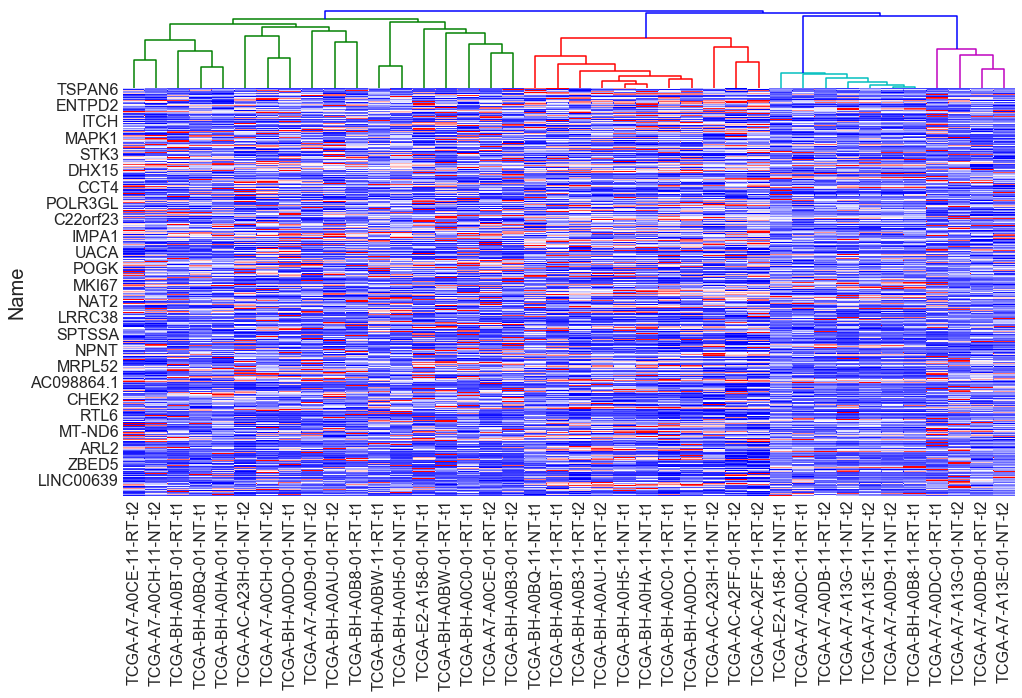

Done with Hierarchical Clustering!


In [20]:
cusca.HierarchicalClustering(pwd = '.',
                              gct_name = final_patients,
                              col_distance_metric = 'pearson',
                              row_distance_metric = 'No_row_clustering',
                              clustering_method = 'average',#'complete',
                              output_base_name = 'HC_output',
                              row_normalization = True,
                              col_normalization = True,
                              row_centering = 'Mean',
                              col_centering = 'Mean',
                              output_distances=False,
                              custom_plot = 'Samples',
                              clusters_to_highlight = 4,
                              show = True)
print("Done with Hierarchical Clustering!")

# cusca.hc_samples(final_patients,clustering_type='single',distance_metric='pearson', clusters_to_highlight=4)

In [21]:
len(np.unique(list(final_patients)))

40

/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_df['Name'] = data_df.index
/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_df['Description'] = data_df['Name']
/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:887: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------


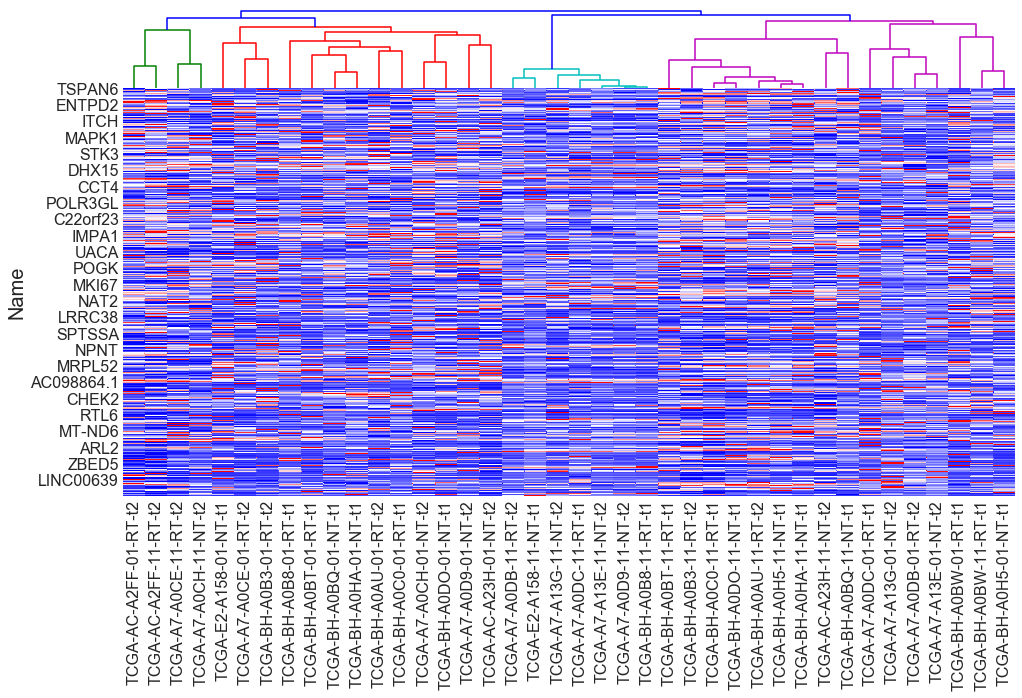

Done with Hierarchical Clustering!


In [22]:
cusca.HierarchicalClustering(pwd = '.',
                              gct_name = final_patients,
                              col_distance_metric = 'pearson',
                              row_distance_metric = 'No_row_clustering',
                              clustering_method = 'complete',#'average',
                              output_base_name = 'HC_output',
                              row_normalization = True,
                              col_normalization = True,
                              row_centering = 'Mean',
                              col_centering = 'Mean',
                              output_distances=False,
                              custom_plot = 'Samples',
                              clusters_to_highlight = 4,
                              show = True)
print("Done with Hierarchical Clustering!")

## Filtering out some samples
Particularly:
- A7-A0CE
- A7-A0CH  
Maaaaaybe:
- AC-A2FF (but I like that this one clusters its normal and cancer tissue together, quite didactic)

In [59]:
# final_patients_filtered = final_patients
patients = list([i for i in final_patients if 'A7-A0CE' not in i])
print('removed {}'.format(list([i  for i in final_patients if 'A7-A0CE' in i])))
patients = [i for i in pats if 'A7-A0CH' not in i]
print('removed {}'.format(list([i  for i in final_patients if 'A7-A0CH' in i])))
# filter(, pats)
# patients = [i for i in pats if i!='']
len(patients)

removed ['TCGA-A7-A0CE-01-RT-t2', 'TCGA-A7-A0CE-11-RT-t2']
removed ['TCGA-A7-A0CH-01-NT-t2', 'TCGA-A7-A0CH-11-NT-t2']


36

Now there are 5 NT-T1, 5 RT-T1, 4 NT-T2, and 4 RT-T2 patients --> we may remove 1 NT-T1 and 1 RT-T1 to make it even

In [60]:
new_patients = final_patients[patients]
new_patients

,TCGA-A7-A0D9-01-NT-t2,TCGA-A7-A0D9-11-NT-t2,TCGA-A7-A0DB-01-RT-t2,TCGA-A7-A0DB-11-RT-t2,TCGA-A7-A0DC-01-RT-t1,TCGA-A7-A0DC-11-RT-t1,TCGA-A7-A13E-01-NT-t2,TCGA-A7-A13E-11-NT-t2,TCGA-A7-A13G-01-NT-t2,TCGA-A7-A13G-11-NT-t2,...,TCGA-BH-A0C0-01-RT-t1,TCGA-BH-A0C0-11-RT-t1,TCGA-BH-A0DO-01-NT-t1,TCGA-BH-A0DO-11-NT-t1,TCGA-BH-A0H5-01-NT-t1,TCGA-BH-A0H5-11-NT-t1,TCGA-BH-A0HA-01-NT-t1,TCGA-BH-A0HA-11-NT-t1,TCGA-E2-A158-01-NT-t1,TCGA-E2-A158-11-NT-t1
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2679.0,3616.0,2203.0,2425.0,4094.0,3945.0,1144.0,3400.0,1009.0,4611.0,...,3141.0,5807.0,5350.0,5403.0,1835.0,5323.0,1086.0,5031.0,8051.0,1821.0
TNMD,73.0,3616.0,47.0,304.0,14.0,685.0,21.0,992.0,65.0,869.0,...,4.0,209.0,104.0,714.0,63.0,245.0,16.0,235.0,1.0,684.0
DPM1,4135.0,1254.0,1131.0,1137.0,3050.0,1520.0,807.0,1242.0,547.0,1896.0,...,3069.0,1872.0,1555.0,1504.0,1741.0,1588.0,1555.0,1768.0,2824.0,881.0
SCYL3,1852.0,820.0,1919.0,687.0,1906.0,1022.0,993.0,931.0,3914.0,1262.0,...,1520.0,2636.0,3116.0,1947.0,1947.0,2180.0,1199.0,2478.0,2331.0,579.0
C1orf112,366.0,225.0,725.0,241.0,846.0,213.0,652.0,259.0,799.0,256.0,...,774.0,463.0,861.0,372.0,543.0,331.0,133.0,422.0,870.0,168.0
FGR,201.0,969.0,846.0,1517.0,102.0,457.0,116.0,664.0,289.0,555.0,...,1385.0,343.0,252.0,392.0,1747.0,325.0,315.0,227.0,167.0,507.0
CFH,1672.0,14103.0,2949.0,8647.0,772.0,8403.0,1665.0,9583.0,1790.0,9020.0,...,2040.0,5251.0,1777.0,4036.0,3341.0,1768.0,3987.0,1041.0,577.0,8852.0
FUCA2,3733.0,3688.0,1737.0,3963.0,2124.0,2350.0,712.0,3005.0,1391.0,3555.0,...,4437.0,2322.0,2729.0,2344.0,2904.0,1806.0,3332.0,1620.0,1708.0,1706.0
GCLC,2527.0,4155.0,2814.0,2833.0,9453.0,4399.0,2506.0,3134.0,1493.0,6008.0,...,2040.0,2461.0,3755.0,2742.0,4116.0,3033.0,1086.0,2551.0,2887.0,2237.0


/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_df['Name'] = data_df.index
/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_df['Description'] = data_df['Name']
/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:887: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------


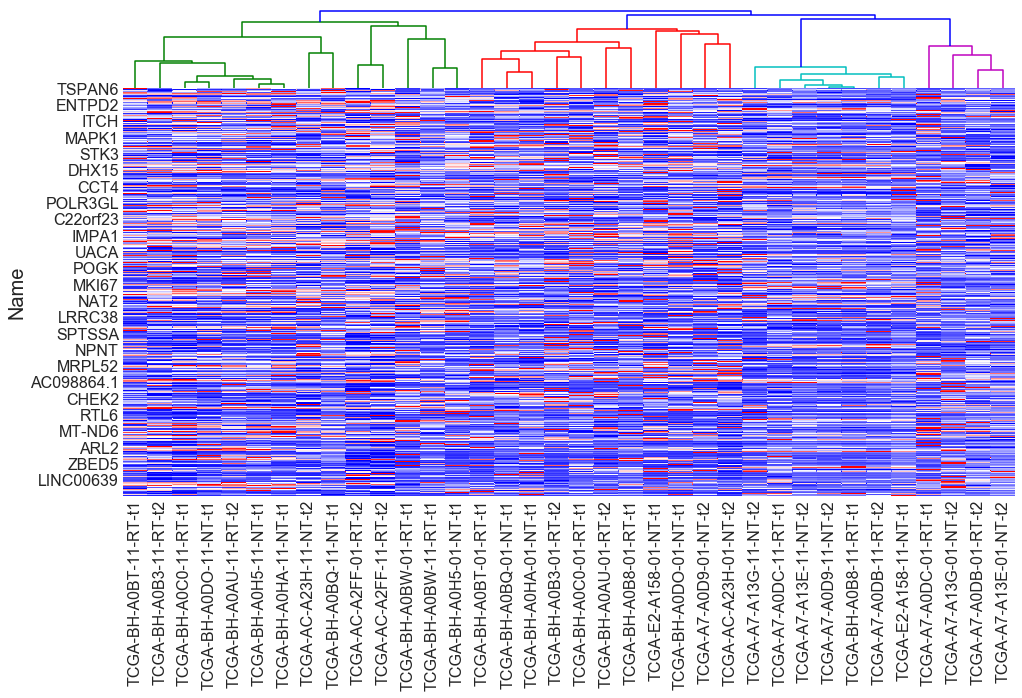

Done with Hierarchical Clustering!


In [49]:
cusca.HierarchicalClustering(pwd = '.',
                              gct_name = new_patients,
                              col_distance_metric = 'pearson',
                              row_distance_metric = 'No_row_clustering',
                              clustering_method = 'complete',#'average',
                              output_base_name = 'HC_output',
                              row_normalization = True,
                              col_normalization = True,
                              row_centering = 'Mean',
                              col_centering = 'Mean',
                              output_distances=False,
                              custom_plot = 'Samples',
                              clusters_to_highlight = 4,
                              show = True)
print("Done with Hierarchical Clustering!")

## Filtering out some samples
Particularly:
- BH-A0BW --> clusters incorrectly, bit it clusters with itself! --> Maybe BH-A0H5
- BH-A0B3 --> for symmetry only (to leave 4 samples of each)  
Maaaaaybe:
- AC-A2FF (but I like that this one clusters its normal and cancer tissue together, quite didactic)

In [66]:
# final_patients_filtered = final_patients
patients = list([i for i in new_patients if 'BH-A0H5' not in i])
print('removed {}'.format(list([i  for i in new_patients if 'BH-A0H5' in i])))
patients = [i for i in patients if 'BH-A0B3' not in i]
print('removed {}'.format(list([i  for i in new_patients if 'BH-A0B3' in i])))
# filter(, pats)
# patients = [i for i in pats if i!='']
len(patients)

removed ['TCGA-BH-A0H5-01-NT-t1', 'TCGA-BH-A0H5-11-NT-t1']
removed ['TCGA-BH-A0B3-01-RT-t2', 'TCGA-BH-A0B3-11-RT-t2']


32

In [67]:
new_new_patients = final_patients[patients]
new_new_patients

,TCGA-A7-A0D9-01-NT-t2,TCGA-A7-A0D9-11-NT-t2,TCGA-A7-A0DB-01-RT-t2,TCGA-A7-A0DB-11-RT-t2,TCGA-A7-A0DC-01-RT-t1,TCGA-A7-A0DC-11-RT-t1,TCGA-A7-A13E-01-NT-t2,TCGA-A7-A13E-11-NT-t2,TCGA-A7-A13G-01-NT-t2,TCGA-A7-A13G-11-NT-t2,...,TCGA-BH-A0BW-01-RT-t1,TCGA-BH-A0BW-11-RT-t1,TCGA-BH-A0C0-01-RT-t1,TCGA-BH-A0C0-11-RT-t1,TCGA-BH-A0DO-01-NT-t1,TCGA-BH-A0DO-11-NT-t1,TCGA-BH-A0HA-01-NT-t1,TCGA-BH-A0HA-11-NT-t1,TCGA-E2-A158-01-NT-t1,TCGA-E2-A158-11-NT-t1
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2679.0,3616.0,2203.0,2425.0,4094.0,3945.0,1144.0,3400.0,1009.0,4611.0,...,3224.0,2705.0,3141.0,5807.0,5350.0,5403.0,1086.0,5031.0,8051.0,1821.0
TNMD,73.0,3616.0,47.0,304.0,14.0,685.0,21.0,992.0,65.0,869.0,...,1.0,52.0,4.0,209.0,104.0,714.0,16.0,235.0,1.0,684.0
DPM1,4135.0,1254.0,1131.0,1137.0,3050.0,1520.0,807.0,1242.0,547.0,1896.0,...,2150.0,1534.0,3069.0,1872.0,1555.0,1504.0,1555.0,1768.0,2824.0,881.0
SCYL3,1852.0,820.0,1919.0,687.0,1906.0,1022.0,993.0,931.0,3914.0,1262.0,...,2003.0,1508.0,1520.0,2636.0,3116.0,1947.0,1199.0,2478.0,2331.0,579.0
C1orf112,366.0,225.0,725.0,241.0,846.0,213.0,652.0,259.0,799.0,256.0,...,588.0,471.0,774.0,463.0,861.0,372.0,133.0,422.0,870.0,168.0
FGR,201.0,969.0,846.0,1517.0,102.0,457.0,116.0,664.0,289.0,555.0,...,571.0,1644.0,1385.0,343.0,252.0,392.0,315.0,227.0,167.0,507.0
CFH,1672.0,14103.0,2949.0,8647.0,772.0,8403.0,1665.0,9583.0,1790.0,9020.0,...,3808.0,9242.0,2040.0,5251.0,1777.0,4036.0,3987.0,1041.0,577.0,8852.0
FUCA2,3733.0,3688.0,1737.0,3963.0,2124.0,2350.0,712.0,3005.0,1391.0,3555.0,...,2550.0,1794.0,4437.0,2322.0,2729.0,2344.0,3332.0,1620.0,1708.0,1706.0
GCLC,2527.0,4155.0,2814.0,2833.0,9453.0,4399.0,2506.0,3134.0,1493.0,6008.0,...,2832.0,2554.0,2040.0,2461.0,3755.0,2742.0,1086.0,2551.0,2887.0,2237.0


/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_df['Name'] = data_df.index
/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_df['Description'] = data_df['Name']
/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:887: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------


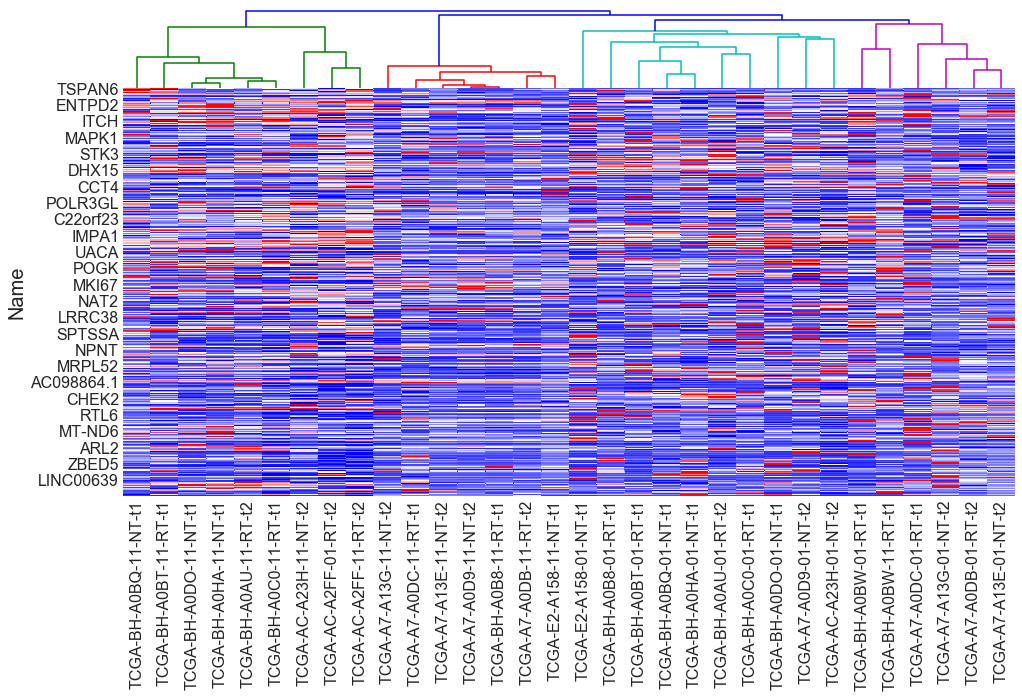

Done with Hierarchical Clustering!


In [68]:
cusca.HierarchicalClustering(pwd = '.',
                              gct_name = new_new_patients,
                              col_distance_metric = 'pearson',
                              row_distance_metric = 'No_row_clustering',
                              clustering_method = 'complete',#'average',
                              output_base_name = 'HC_output',
                              row_normalization = True,
                              col_normalization = True,
                              row_centering = 'Mean',
                              col_centering = 'Mean',
                              output_distances=False,
                              custom_plot = 'Samples',
                              clusters_to_highlight = 4,
                              show = True)
print("Done with Hierarchical Clustering!")

/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_df['Name'] = data_df.index
/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_df['Description'] = data_df['Name']
/Users/edjuaro/miniconda3/lib/python3.6/site-packages/cuzcatlan/clustering.py:887: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------


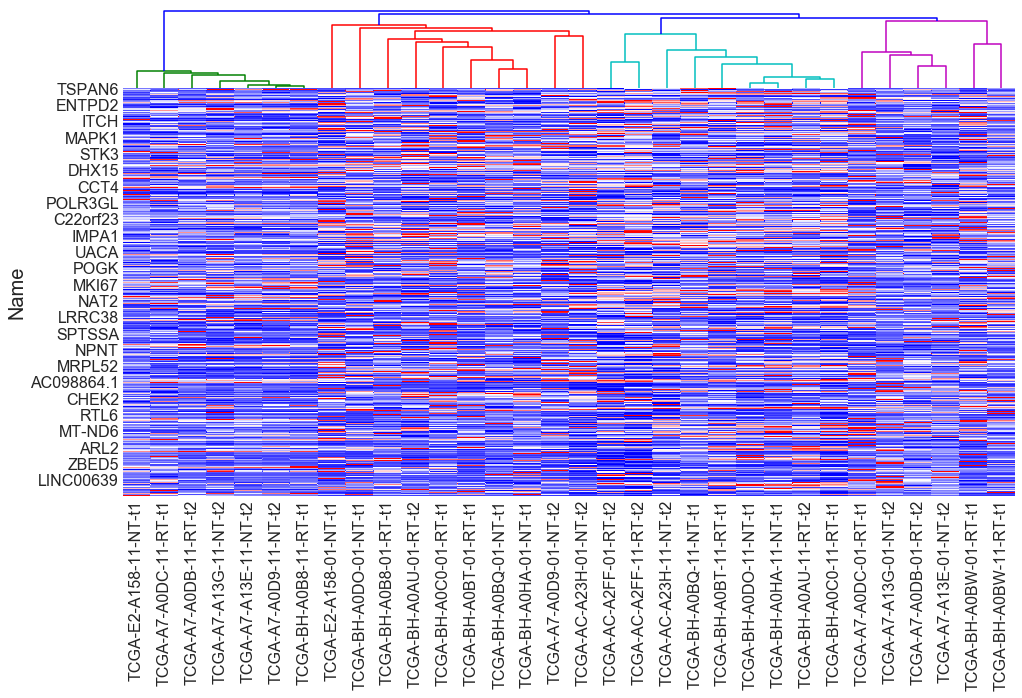

Done with Hierarchical Clustering!


In [69]:
cusca.HierarchicalClustering(pwd = '.',
                              gct_name = new_new_patients,
                              col_distance_metric = 'pearson',
                              row_distance_metric = 'No_row_clustering',
                              clustering_method = 'average',#'complete',
                              output_base_name = 'HC_output',
                              row_normalization = True,
                              col_normalization = True,
                              row_centering = 'Mean',
                              col_centering = 'Mean',
                              output_distances=False,
                              custom_plot = 'Samples',
                              clusters_to_highlight = 4,
                              show = True)
print("Done with Hierarchical Clustering!")

In [72]:
new_new_patients

,Description,TCGA-A7-A0D9-01-NT-t2,TCGA-A7-A0D9-11-NT-t2,TCGA-A7-A0DB-01-RT-t2,TCGA-A7-A0DB-11-RT-t2,TCGA-A7-A0DC-01-RT-t1,TCGA-A7-A0DC-11-RT-t1,TCGA-A7-A13E-01-NT-t2,TCGA-A7-A13E-11-NT-t2,TCGA-A7-A13G-01-NT-t2,...,TCGA-BH-A0BW-01-RT-t1,TCGA-BH-A0BW-11-RT-t1,TCGA-BH-A0C0-01-RT-t1,TCGA-BH-A0C0-11-RT-t1,TCGA-BH-A0DO-01-NT-t1,TCGA-BH-A0DO-11-NT-t1,TCGA-BH-A0HA-01-NT-t1,TCGA-BH-A0HA-11-NT-t1,TCGA-E2-A158-01-NT-t1,TCGA-E2-A158-11-NT-t1
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,TSPAN6,2679.0,3616.0,2203.0,2425.0,4094.0,3945.0,1144.0,3400.0,1009.0,...,3224.0,2705.0,3141.0,5807.0,5350.0,5403.0,1086.0,5031.0,8051.0,1821.0
TNMD,TNMD,73.0,3616.0,47.0,304.0,14.0,685.0,21.0,992.0,65.0,...,1.0,52.0,4.0,209.0,104.0,714.0,16.0,235.0,1.0,684.0
DPM1,DPM1,4135.0,1254.0,1131.0,1137.0,3050.0,1520.0,807.0,1242.0,547.0,...,2150.0,1534.0,3069.0,1872.0,1555.0,1504.0,1555.0,1768.0,2824.0,881.0
SCYL3,SCYL3,1852.0,820.0,1919.0,687.0,1906.0,1022.0,993.0,931.0,3914.0,...,2003.0,1508.0,1520.0,2636.0,3116.0,1947.0,1199.0,2478.0,2331.0,579.0
C1orf112,C1orf112,366.0,225.0,725.0,241.0,846.0,213.0,652.0,259.0,799.0,...,588.0,471.0,774.0,463.0,861.0,372.0,133.0,422.0,870.0,168.0
FGR,FGR,201.0,969.0,846.0,1517.0,102.0,457.0,116.0,664.0,289.0,...,571.0,1644.0,1385.0,343.0,252.0,392.0,315.0,227.0,167.0,507.0
CFH,CFH,1672.0,14103.0,2949.0,8647.0,772.0,8403.0,1665.0,9583.0,1790.0,...,3808.0,9242.0,2040.0,5251.0,1777.0,4036.0,3987.0,1041.0,577.0,8852.0
FUCA2,FUCA2,3733.0,3688.0,1737.0,3963.0,2124.0,2350.0,712.0,3005.0,1391.0,...,2550.0,1794.0,4437.0,2322.0,2729.0,2344.0,3332.0,1620.0,1708.0,1706.0
GCLC,GCLC,2527.0,4155.0,2814.0,2833.0,9453.0,4399.0,2506.0,3134.0,1493.0,...,2832.0,2554.0,2040.0,2461.0,3755.0,2742.0,1086.0,2551.0,2887.0,2237.0


In [71]:
cusca.df2gct(new_new_patients, name='selected_patients.gct', add_dummy_descriptions=True)

Trying one more thing, just to see how the clustering goes without column normalization

----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------


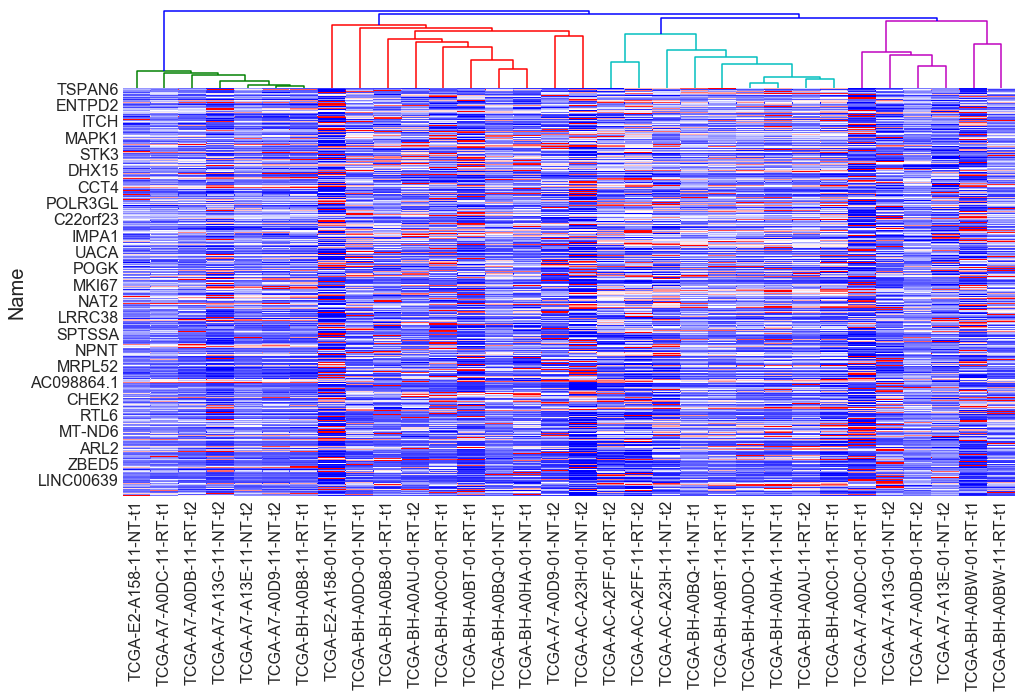

Done with Hierarchical Clustering!


In [3]:
import cuzcatlan as cusca
cusca.HierarchicalClustering(pwd = '.',
                              gct_name = 'selected_patients.gct',
                              col_distance_metric = 'pearson',
                              row_distance_metric = 'No_row_clustering',
                              clustering_method = 'average',#'complete',
                              output_base_name = 'HC_output',
                              row_normalization = True,
                              col_normalization = False,
                              row_centering = 'Mean',
                              col_centering = 'Mean',
                              output_distances=False,
                              custom_plot = 'Samples',
                              clusters_to_highlight = 4,
                              show = True)
print("Done with Hierarchical Clustering!")

**Even without column normalizing it looks good!**

----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------


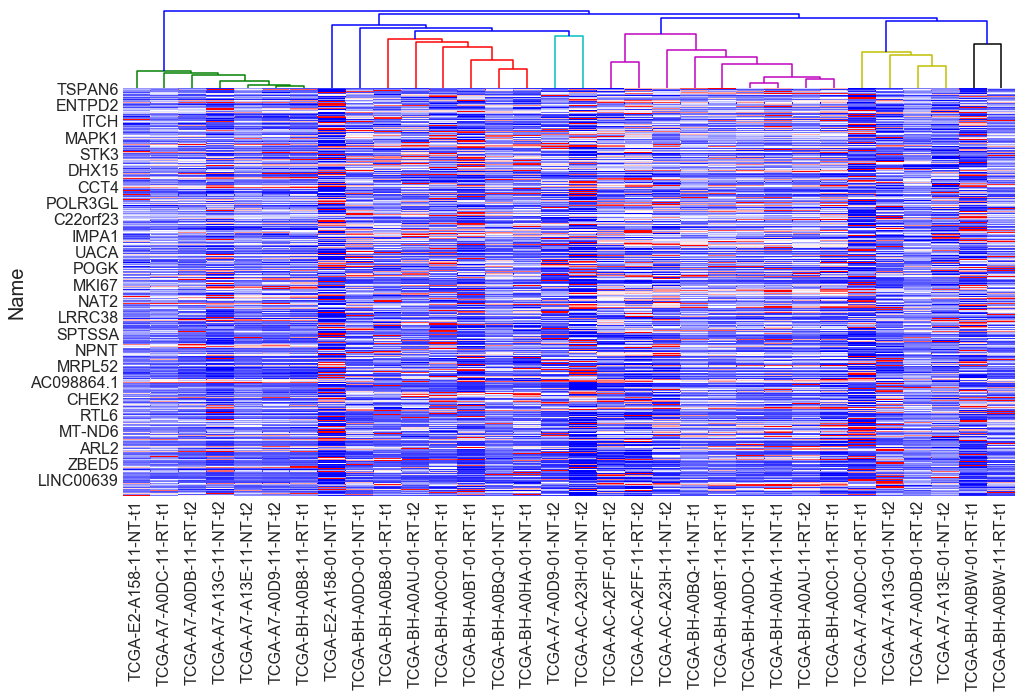

Done with Hierarchical Clustering!


In [9]:
cusca.HierarchicalClustering(pwd = '.',
                              gct_name = 'selected_patients.gct',
                              col_distance_metric = 'pearson',
                              row_distance_metric = 'No_row_clustering',
                              clustering_method = 'average',#'complete',
                              output_base_name = 'HC_output',
                              row_normalization = True,
                              col_normalization = False,
                              row_centering = 'Mean',
                              col_centering = 'Mean',
                              output_distances=False,
                              custom_plot = 'Samples',
                              clusters_to_highlight = 8,
                              show = True)
print("Done with Hierarchical Clustering!")

Now trying k-means clustering for the heck of it

In [4]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.GPAuthWidget(genepattern.register_session("https://genepattern.broadinstitute.org/gp", "", ""))

GPAuthWidget()

In [5]:
kmeansclustering_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00081')
kmeansclustering_job_spec = kmeansclustering_task.make_job_spec()
kmeansclustering_job_spec.set_parameter("input.filename", "https://genepattern.broadinstitute.org/gp/users/edjuaro/tmp/run6361702402699713909.tmp/selected_patients.gct")
kmeansclustering_job_spec.set_parameter("output.base.name", "<input.filename_basename>_KMcluster_output")
kmeansclustering_job_spec.set_parameter("number.of.clusters", "4")
kmeansclustering_job_spec.set_parameter("seed.value", "12345")
kmeansclustering_job_spec.set_parameter("cluster.by", "1")
kmeansclustering_job_spec.set_parameter("distance.metric", "0")
genepattern.GPTaskWidget(kmeansclustering_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00081')

In [6]:
job1663697 = gp.GPJob(genepattern.get_session(0), 1663697)
genepattern.GPJobWidget(job1663697)

GPJobWidget(job_number=1663697)

I suspected it from the beginning! (Didn't do a good job.)